# Exploratory data analysis

### Importing the necessary libraries

In [225]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle


# Let's import some packages we'll need. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import make_blobs, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
import autograd.numpy as np
from autograd import grad

In [226]:
import warnings
warnings.filterwarnings('ignore')

In [227]:
# Load dataset into pandas DataFrame
df = pd.read_csv("diabetes.csv") 

### Overview of the data 

In [230]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [188]:
# view dimensions of dataset
print("Shape of data", df.shape) 

# view summary of dataset
df.info()

Shape of data (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes               253680 non-null  int64
 1   HighBP                 253680 non-null  int64
 2   HighChol               253680 non-null  int64
 3   BMI                    253680 non-null  int64
 4   Smoker                 253680 non-null  int64
 5   Stroke                 253680 non-null  int64
 6   Myocardial             253680 non-null  int64
 7   PhysActivity           253680 non-null  int64
 8   Fruit                  253680 non-null  int64
 9   Vegetables             253680 non-null  int64
 10  HeavyDrinker           253680 non-null  int64
 11  HasHealthcare          253680 non-null  int64
 12  NotAbleToAffordDoctor  253680 non-null  int64
 13  GeneralHealth          253680 non-null  int64
 14  MentalHealth           253680 non-null  i

In [189]:
# let's preview the dataset
df
df.head()

Diabetes  HighBP  HighChol  BMI  Smoker  Stroke  Myocardial  PhysActivity  \
0         0       1         1   40       1       0           0             0   
1         0       0         0   25       1       0           0             1   
2         0       1         1   28       0       0           0             0   
3         0       1         0   27       0       0           0             1   
4         0       1         1   24       0       0           0             1   

   Fruit  Vegetables  ...  NotAbleToAffordDoctor  GeneralHealth  MentalHealth  \
0      0           1  ...                      0              5            18   
1      0           0  ...                      1              3             0   
2      1           0  ...                      1              5            30   
3      1           1  ...                      0              2             0   
4      1           1  ...                      0              2             3   

   PhysicalHealth  HardToClimbStairs  BiologicalSex  AgeBracket  \
0              15                  1              1           9   
1               0                  0              1           7   
2              30                  1              1           9   
3               0                  0              1          11   
4               0                  0              1          11   

   EducationBracket  IncomeBracket  Zodiac  
0                 4              3      10  
1                 6              1      11  
2                 4              8       2  
3                 3              6      11  
4                 5              4       8  

[5 rows x 22 columns]

In [190]:
# view the column names of the dataframe
col_names = df.columns
col_names

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
      dtype='object')

### Check whether our data is balanced or unbalanced

In [191]:
# The number of data points.
N = len(df)
print('N = {:d} data points'.format(N))

# check distribution of target_class column
df['Diabetes'].value_counts()

# view the percentage distribution of target_class column
df['Diabetes'].value_counts()/float(len(df))

N = 253680 data points


0    0.860667
1    0.139333
Name: Diabetes, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. 
So, this is a class imbalanced problem. I will deal with that in later section. 

Text(0.5, 1.0, 'Diabetes Dataset: Class Counts')

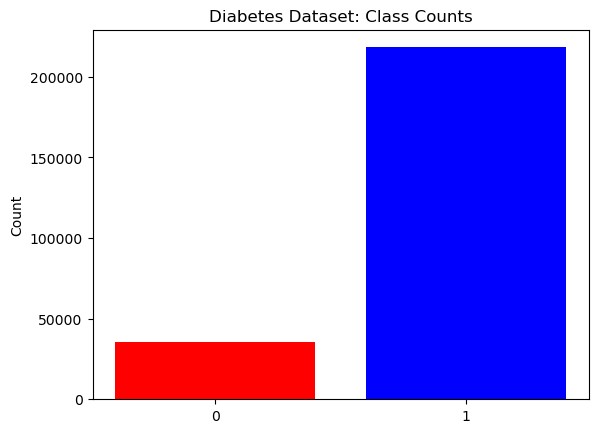

In [192]:
# Give a barplot of each class.
plt.figure()
classes = df['Diabetes'].unique()
plt.bar([0,1], df['Diabetes'].value_counts(ascending=True), color=['r', 'b'], tick_label=classes)
plt.ylabel('Count')
plt.title('Diabetes Dataset: Class Counts')

This dataset is unbalanced because there are more examples of non diabetic people.  This is typical of many real-life datasets where we are sometimes limited in how many training examples we have.

<AxesSubplot:>

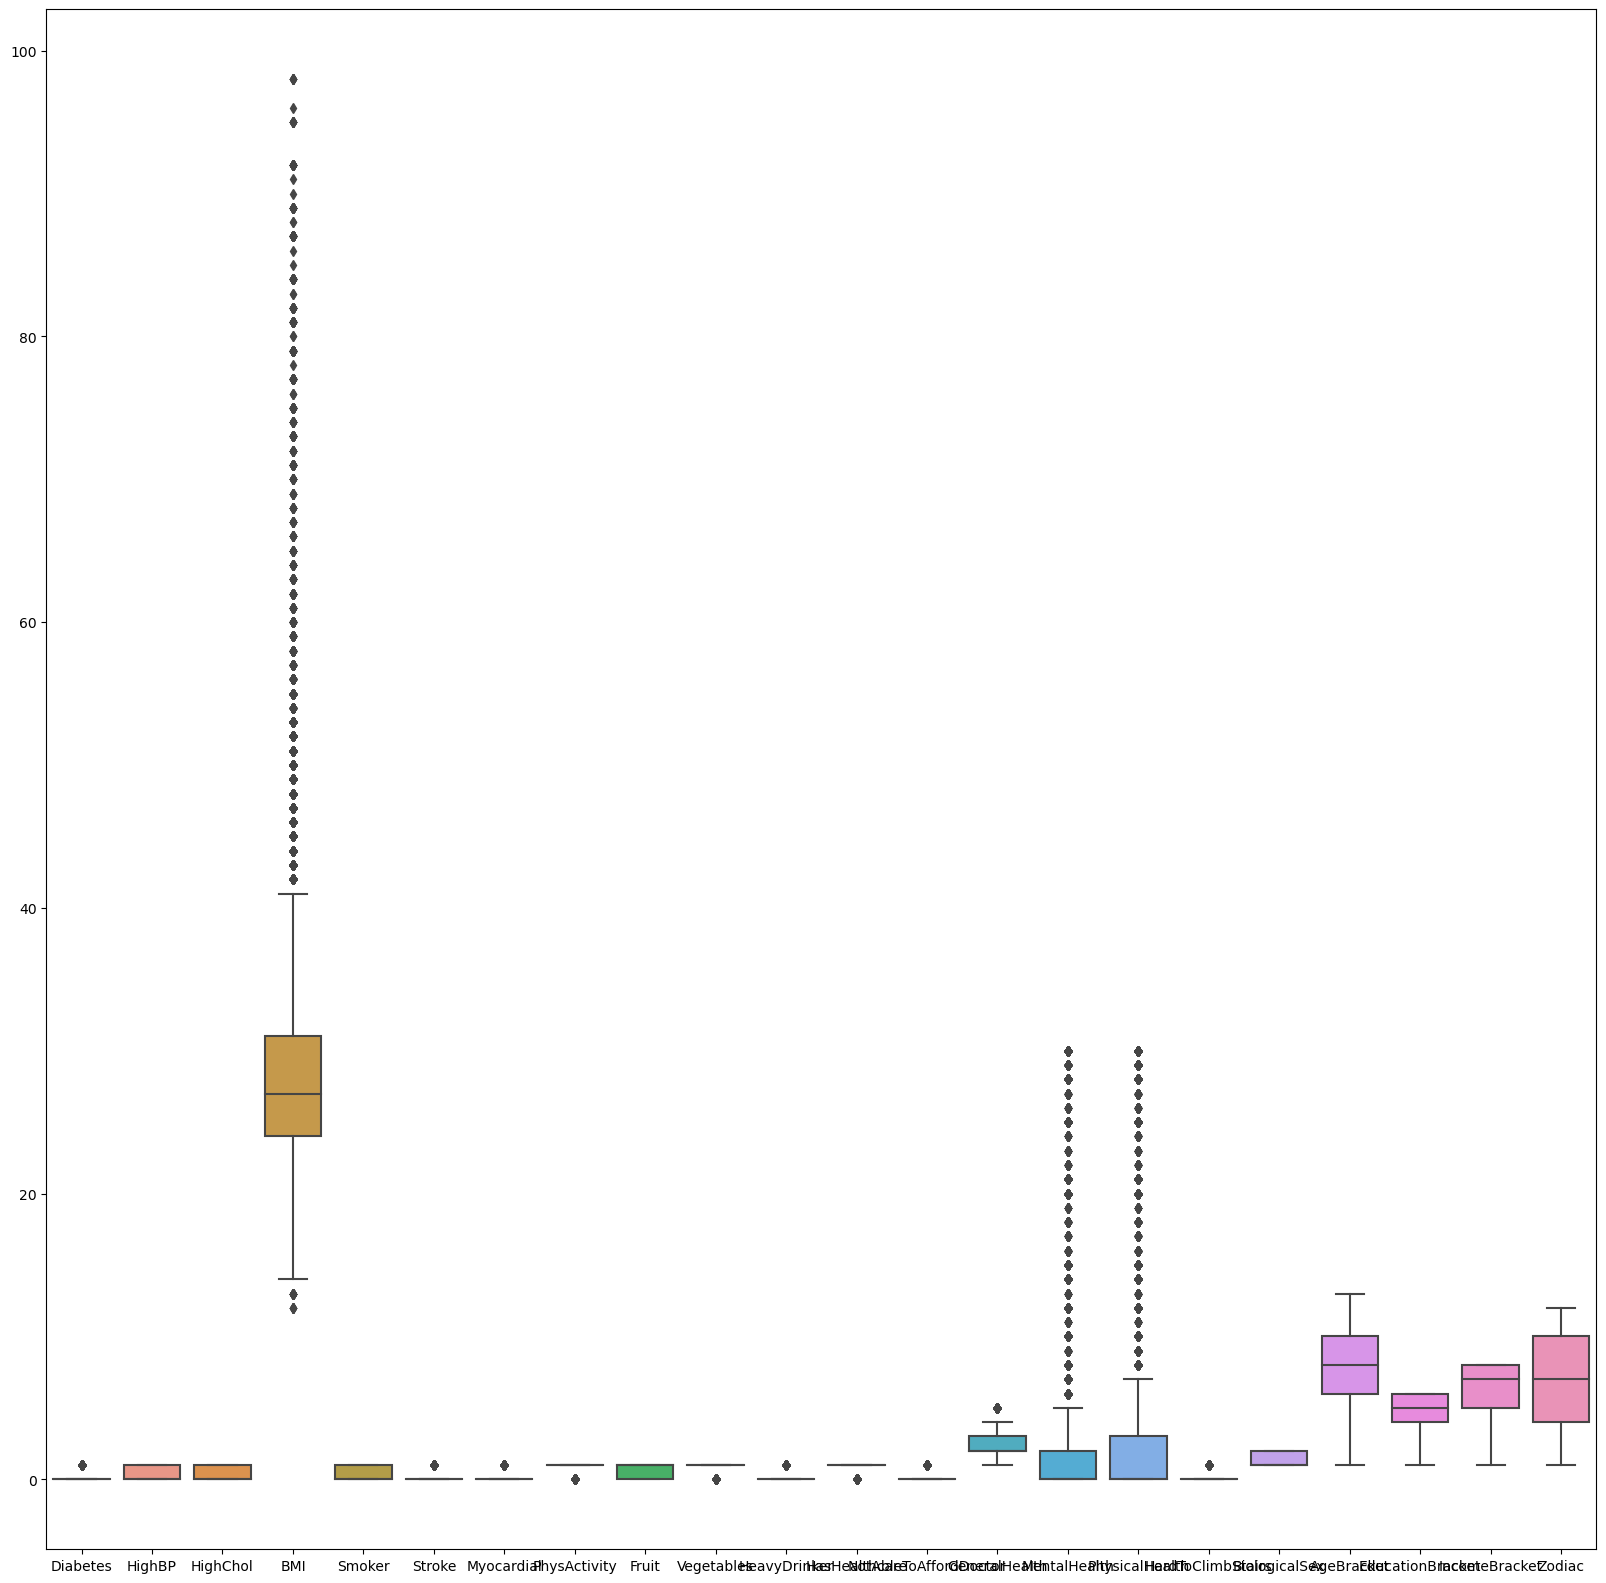

In [193]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

### Checking for missing values

In [194]:
# check for missing values in variables
df.isnull().sum()

Diabetes                 0
HighBP                   0
HighChol                 0
BMI                      0
Smoker                   0
Stroke                   0
Myocardial               0
PhysActivity             0
Fruit                    0
Vegetables               0
HeavyDrinker             0
HasHealthcare            0
NotAbleToAffordDoctor    0
GeneralHealth            0
MentalHealth             0
PhysicalHealth           0
HardToClimbStairs        0
BiologicalSex            0
AgeBracket               0
EducationBracket         0
IncomeBracket            0
Zodiac                   0
dtype: int64

We can see that there are no missing values in the dataset. 

In [195]:
# view summary statistics in numerical variables
round(df.describe(),2)

Diabetes     HighBP   HighChol        BMI     Smoker     Stroke  \
count  253680.00  253680.00  253680.00  253680.00  253680.00  253680.00   
mean        0.14       0.43       0.42      28.38       0.44       0.04   
std         0.35       0.49       0.49       6.61       0.50       0.20   
min         0.00       0.00       0.00      12.00       0.00       0.00   
25%         0.00       0.00       0.00      24.00       0.00       0.00   
50%         0.00       0.00       0.00      27.00       0.00       0.00   
75%         0.00       1.00       1.00      31.00       1.00       0.00   
max         1.00       1.00       1.00      98.00       1.00       1.00   

       Myocardial  PhysActivity      Fruit  Vegetables  ...  \
count   253680.00     253680.00  253680.00   253680.00  ...   
mean         0.09          0.76       0.63        0.81  ...   
std          0.29          0.43       0.48        0.39  ...   
min          0.00          0.00       0.00        0.00  ...   
25%          0.00          1.00       0.00        1.00  ...   
50%          0.00          1.00       1.00        1.00  ...   
75%          0.00          1.00       1.00        1.00  ...   
max          1.00          1.00       1.00        1.00  ...   

       NotAbleToAffordDoctor  GeneralHealth  MentalHealth  PhysicalHealth  \
count              253680.00      253680.00     253680.00       253680.00   
mean                    0.08           2.51          3.18            4.24   
std                     0.28           1.07          7.41            8.72   
min                     0.00           1.00          0.00            0.00   
25%                     0.00           2.00          0.00            0.00   
50%                     0.00           2.00          0.00            0.00   
75%                     0.00           3.00          2.00            3.00   
max                     1.00           5.00         30.00           30.00   

       HardToClimbStairs  BiologicalSex  AgeBracket  EducationBracket  \
count          253680.00      253680.00   253680.00         253680.00   
mean                0.17           1.44        8.03              5.05   
std                 0.37           0.50        3.05              0.99   
min                 0.00           1.00        1.00              1.00   
25%                 0.00           1.00        6.00              4.00   
50%                 0.00           1.00        8.00              5.00   
75%                 0.00           2.00       10.00              6.00   
max                 1.00           2.00       13.00              6.00   

       IncomeBracket     Zodiac  
count      253680.00  253680.00  
mean            6.05       6.50  
std             2.07       3.45  
min             1.00       1.00  
25%             5.00       4.00  
50%             7.00       7.00  
75%             8.00      10.00  
max             8.00      12.00  

[8 rows x 22 columns]

#### VIF score

In Python, there are several ways to detect multicollinearity in a dataset, such as using the Variance Inflation Factor (VIF) or calculating the correlation matrix of the independent variables. To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. In this article, we will focus on the most common one – VIF (Variance Inflation Factors).

In [196]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [197]:
vif_score(X)

FEATURE  VIF_SCORE
0                  HighBP  10.894278
1              AgeBracket  10.131694
2           BiologicalSex   7.913852
3            PhysActivity   1.020430
4  Age_gender_interaction  15.948017
5      BP_age_interaction  12.933611

As the VIF scores are close or equal to 1, it means that the variables are not correlated and multicollinearity is least likely for the regression model.

### Summary of numerical variables
- All the variables in the data set are numerical 
- There is a mix of categorical variables and binary variables. 
- The target class is binary. 
- There are no missing values in the dataset.

# Data Preprocessing
As long as the data is all numerical it is fine to use for logistic regression, even if we have different types of numerical variables (binary, different values depending on a scale). However, it's important to ensure that the numerical variables are properly encoded and scaled, as different scales or encodings can affect the performance of the logistic regression model. For example, binary variables can be left as is, while continuous variables may need to be scaled to have zero mean and unit variance.

### Getting the data to the right scale 

As our data set is a mix of binary variables, categorical variables, and continuous variables. Therefore, in order for our analysis to make sense we are going to make correctly implement the categorical variables into a set of binary variables.  

TO DO
If you want to convert the "Age bracket" predictor into a binary predictor, you would need to create 13 new binary predictors, one for each age range. Each binary predictor would have a value of 1 if the individual's age falls within that age range, and a value of 0 otherwise.


In [198]:
# TRY THIS CODE LATTER !!! 

from sklearn.preprocessing import OneHotEncoder

# Create a new DataFrame to store the binary variables
age_dummies = pd.get_dummies(df['AgeBracket'], prefix='age')

# Combine the original DataFrame and the new DataFrame with binary variables
data_with_age_dummies = pd.concat([df, age_dummies], axis=1)

# Drop the original age_bracket column
data_with_age_dummies = data_with_age_dummies.drop('AgeBracket', axis=1)

# Fit and transform a OneHotEncoder to do the same
enc = OneHotEncoder(sparse=False)
age_encoded = enc.fit_transform(df[['AgeBracket']])
age_encoded_df = pd.DataFrame(age_encoded, columns=['age_'+str(i) for i in range(1,14)])

# Combine the original DataFrame and the new DataFrame with binary variables
data_with_age_encoded = pd.concat([df, age_encoded_df], axis=1)

# Drop the original age_bracket column
data_with_age_encoded = data_with_age_encoded.drop('AgeBracket', axis=1)

In [199]:
data_with_age_encoded

Diabetes  HighBP  HighChol  BMI  Smoker  Stroke  Myocardial  \
0              0       1         1   40       1       0           0   
1              0       0         0   25       1       0           0   
2              0       1         1   28       0       0           0   
3              0       1         0   27       0       0           0   
4              0       1         1   24       0       0           0   
...          ...     ...       ...  ...     ...     ...         ...   
253675         0       1         1   45       0       0           0   
253676         1       1         1   18       0       0           0   
253677         0       0         0   28       0       0           0   
253678         0       1         0   23       0       0           0   
253679         1       1         1   25       0       0           1   

        PhysActivity  Fruit  Vegetables  ...  age_4  age_5  age_6  age_7  \
0                  0      0           1  ...    0.0    0.0    0.0    0.0   
1                  1      0           0  ...    0.0    0.0    0.0    1.0   
2                  0      1           0  ...    0.0    0.0    0.0    0.0   
3                  1      1           1  ...    0.0    0.0    0.0    0.0   
4                  1      1           1  ...    0.0    0.0    0.0    0.0   
...              ...    ...         ...  ...    ...    ...    ...    ...   
253675             0      1           1  ...    0.0    1.0    0.0    0.0   
253676             0      0           0  ...    0.0    0.0    0.0    0.0   
253677             1      1           0  ...    0.0    0.0    0.0    0.0   
253678             0      1           1  ...    0.0    0.0    0.0    1.0   
253679             1      1           0  ...    0.0    0.0    0.0    0.0   

        age_8  age_9  age_10  age_11  age_12  age_13  
0         0.0    1.0     0.0     0.0     0.0     0.0  
1         0.0    0.0     0.0     0.0     0.0     0.0  
2         0.0    1.0     0.0     0.0     0.0     0.0  
3         0.0    0.0     0.0     1.0     0.0     0.0  
4         0.0    0.0     0.0     1.0     0.0     0.0  
...       ...    ...     ...     ...     ...     ...  
253675    0.0    0.0     0.0     0.0     0.0     0.0  
253676    0.0    0.0     0.0     1.0     0.0     0.0  
253677    0.0    0.0     0.0     0.0     0.0     0.0  
253678    0.0    0.0     0.0     0.0     0.0     0.0  
253679    0.0    1.0     0.0     0.0     0.0     0.0  

[253680 rows x 34 columns]

You will have 13 additional columns in your dataset, each representing one age bracket. The value in each column will be either 0 or 1, depending on whether the observation belongs to that age bracket or not.

In [200]:
# # Get the number of columns
num_columns = data_with_age_encoded.shape[1]

# Print the number of columns
print(f"The DataFrame has {num_columns} columns.")

# 21 + 13 = 34 columns

The DataFrame has 34 columns.


### Defining X (features) and y (target) 
Split dataset into features and target variable

In [201]:
#y = df['Diabetes']
y = data_with_age_encoded['Diabetes']


In [202]:
# X = df.drop(columns=['Diabetes']) 
X = data_with_age_encoded.drop(columns=['Diabetes']) 


## Split the data into train and test

We'll use a 80/20 split for our training/test sets.

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=144)

In [204]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((202944, 33), (50736, 33))

# Fitting ML model to data 

## A. Logistic regression 

### Finding the best predictor
In order to find the best predictor we will implement two methods; first run logistic regression on each of the features sperately and compare which one did best, and also do the leave out method; everytime drop a predictor and see which one impacts the AUC score value the most. 

#### Create a table to visualize each of the metrics for each of the predictors


In [205]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# compute metrics
metrics = pd.DataFrame(columns=['Predictor', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score'])
print(y.shape)
print(len(y[y==0])/len(y))

for column in X.columns:
    # Select the current predictor and split the data
    X_train, X_test, y_train, y_test = train_test_split(X[[column]], y, test_size=.20, random_state=144)
    
    # Fit a logistic regression model
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    metrics = metrics.append({'Predictor': column, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC score':auc_score}, ignore_index=True)


# display metrics
print(metrics)

(253680,)
0.8606669820245979
                Predictor  Accuracy  Precision    Recall  F1-score  AUC score
0                  HighBP  0.643389   0.245914  0.751517  0.370569   0.688675
1                HighChol  0.620861   0.219332  0.669818  0.330456   0.641365
2                     BMI  0.676640   0.233819  0.577536  0.332872   0.635133
3                  Smoker  0.558282   0.160583  0.511500  0.244429   0.538689
4                  Stroke  0.846362   0.331749  0.098490  0.151888   0.533139
5              Myocardial  0.827558   0.326586  0.220827  0.263490   0.573448
6            PhysActivity  0.723214   0.218015  0.379427  0.276917   0.579230
7                   Fruit  0.611380   0.158316  0.412869  0.228871   0.528240
8              Vegetables  0.739790   0.175114  0.232538  0.199782   0.527344
9            HeavyDrinker  0.188959   0.144640  0.978129  0.252013   0.519478
10          HasHealthcare  0.177527   0.141328  0.963031  0.246483   0.506510
11  NotAbleToAffordDoctor  0.805680

#### Identify the best predictor(s)

We see from the table obtained that the HighBP is the best predictor for the case of logistic regression with an AUC score of  0.688675.  

### Another method for finding the best predictor with logistic regression

0.6886751071423851
0.6413650353914419
0.6351334904415656
0.5386888636679903
0.5331393439467375
0.5734480959252977
0.5792299292575895
0.5282400851000213
0.5273439349575163
0.5194775521493934
0.5065102960681868
0.5112690915575439
0.6890901223613932
0.5339872171847108
0.5951731345278293
0.6212576125225494
0.5201938761564471
0.565320252009838
0.5953712576553556
0.49906210782389626
0.5114144152554656
0.5155259950587195
0.5203082355896002
0.5216261217013826
0.5191977261636154
0.5151935458246211
0.5118126641583258
0.49700153839880945
0.5193999919758315
0.5363793080635558
0.5278094059101476
0.5216767616980001
0.5128116977053856


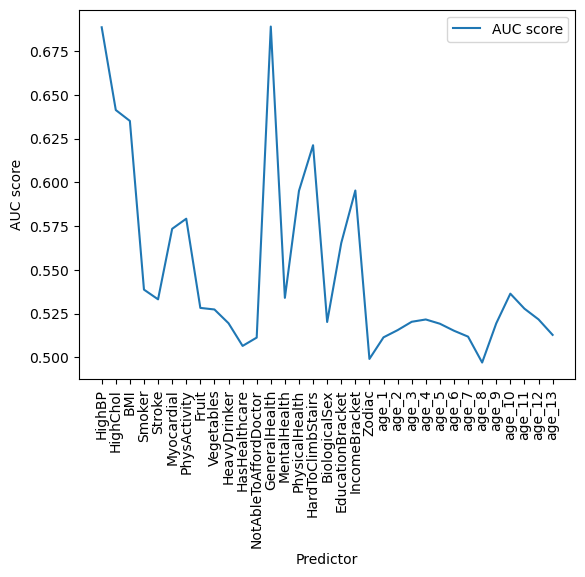

The best predictor is: HighBP


In [206]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
    
# compute metrics
metrics = pd.DataFrame(columns=['Predictor', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC score'])
# print(y.shape)
# print(len(y[y==0])/len(y))

# dictionary to store the AUC scores for each predictor
auc_dict = {}

for column in X.columns:
    # Select the current predictor and split the data
    X_train, X_test, y_train, y_test = train_test_split(X[[column]], y, test_size=.20, random_state=144)
    
    # Fit a logistic regression model
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print(auc_score)
    
    metrics = metrics.append({'Predictor': column, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC score':auc_score}, ignore_index=True)
    
    # Store the AUC score in the dictionary
    auc_dict[column] = auc_score
    
# Plot the learning curve for each predictor
x_axis = range(1, len(X.columns)+1)
plt.plot(x_axis, np.array(list(auc_dict.values())), label='AUC score')
plt.legend(loc='best')
plt.xticks(x_axis, list(auc_dict.keys()), rotation=90)
plt.xlabel('Predictor')
plt.ylabel('AUC score')
plt.show()

# Sort the predictors by their AUC score in descending order
sorted_predictors = sorted(auc_dict.items(), key=lambda x: x[1], reverse=True)

# Find the predictor that gives the highest increase in AUC score
best_predictor = ''
max_auc_diff = -np.inf
for i in range(len(sorted_predictors)-1):
    auc_diff = auc_dict[sorted_predictors[i][0]] - auc_dict[sorted_predictors[i+1][0]]
    if auc_diff > max_auc_diff:
        max_auc_diff = auc_diff
        best_predictor = sorted_predictors[i][0]

print('The best predictor is:', best_predictor)

We can see that the predictor that gives the highest increase in AUC scoree is HighBP therefore making it the best predictor. 

### Compare two logistic regression models - all predictors vs best predictor
As we see from the AUC scores we got for logistic regression, we clearly see that training the model on all the predictors yields to a higher AUC score (0.8224129104636402), indeed, the other training all have lower AUC scores. Indeed, let's compare training the model on all the predictor and on the best predictor HighBP. 

In [207]:
# select the 'HighBP' feature only
X_HighBP = df[['HighBP']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_HighBP, y, test_size=0.2, random_state=144)

# fit a logistic regression model
model_HighBP = LogisticRegression(class_weight='balanced')
model_HighBP.fit(X_train, y_train)

# make predictions on the test set
y_pred = model_HighBP.predict_proba(X_test)[:, 1]


In [208]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=144)

# fit a logistic regression model
model_full = LogisticRegression(class_weight='balanced')
model_full.fit(X_train_full, y_train_full)

# make predictions on the test set
y_pred_full = model_full.predict_proba(X_test_full)


In [209]:
# AUC of best model with best predictor - HighBP
auc_score_HighBP = roc_auc_score(y_test, y_pred)
print('AUC for training model on best predictor only',auc_score_HighBP)

# AUC of best model training on all predictors
auc_score_full = roc_auc_score(y_test_full, y_pred_full[:, 1])
print('AUC for training model on all predictors',auc_score_full)


AUC for training model on best predictor only 0.6886751071423851
AUC for training model on all predictors 0.8224129104636402


The AUC score for the full model was found to be 0.8224129104636402, indeed, there is a significant different with the AUC we got for training with HighBP; 0.6886751071423851. 
As we'd expect, training with more features gives us a more flexible model. Excluding the remaining features is equivalent to setting their weights to 0. Thus, we are solving a constrained minimization problem when we train, which will worse than solving the unconstrained problem where we are using all of the features.

### Confusion matrix <a class="anchor" id="16"></a>

In [210]:
# DE REC 5 
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

threshold = 0.6
y_pred_binary = (y_pred >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[27317 16332]
 [ 1761  5326]]

True Positives(TP) =  27317
True Negatives(TN) =  5326
False Positives(FP) =  16332
False Negatives(FN) =  1761


<AxesSubplot:>

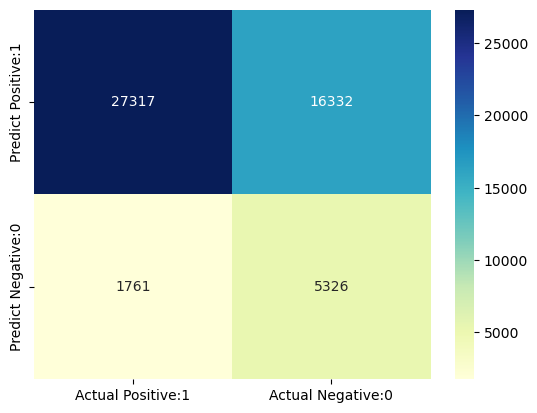

In [211]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## ROC Curve <a class="anchor" id="18"></a>
In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

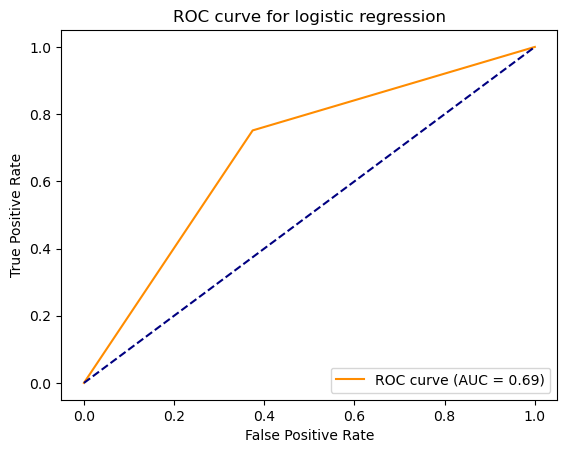

In [212]:
# code from REC3
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the curve (AUC)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for logistic regression')
plt.legend(loc="lower right")
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### Comments

- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying diabetes. 

## B. Support Vector Machines

In [213]:
# [ code from rec5 -> also binary classification problem ]
# TO DO: this data set is litteraly like our data set for Diabeetes , revisit the methods they used 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import LinearSVC
import numpy as np



%matplotlib inline

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predict labels for the test data
y_pred = svm.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

# Get the decision scores and feature names for all samples
decision_scores = svm.decision_function(X_test)
# print("decision_scores: ",decision_scores)
sorted_scores = sorted(abs(decision_scores), reverse=True)  # sort the scores in descending order

feature_names = ["Feature {}".format(i+1) for i in range(X.shape[1])]

# Find the index of the best predictor (feature)
best_predictor_idx = np.argmax(np.abs(svm.coef_))
best_predictor_name = feature_names[best_predictor_idx]
print("Best predictor is", best_predictor_name)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, decision_scores)
print("AUC score:", auc_score)

Accuracy of SVM model: 0.8630755282245348
Best predictor is Feature 22
AUC score: 0.8073200972038515


You can use the decision_function method to compare the decision scores of different predictors in your dataset, and the predictor with the highest decision score can be considered as the best predictor according to the LinearSVC model. 

### ROC curve

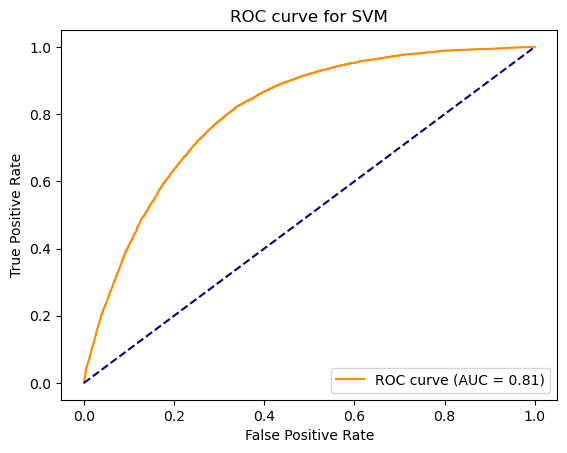

In [216]:
# code from REC3
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# calculate the area under the curve (AUC)
auc = roc_auc_score(y_test, decision_scores)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVM')
plt.legend(loc="lower right")
plt.show()

## C. Decision tree

In [217]:
import pandas as pd # for manipulating dataset
import numpy as np 
from sklearn import datasets # We can use some uploaded datasets from sklearn
from sklearn import model_selection
from sklearn import tree # for decision tree and to plot tree
import math
from sklearn.datasets import load_iris,load_boston
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt # visualize the data

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier 
clf = DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test) # will give me predictions wheter diabetes OR NOT 

# divide the correct predictions on the total number of predictions -> to see how well we did 
print("Accuracy: ", np.sum(preds == y_test)/len(preds)) 

# Compute the AUC-ROC score
auc = roc_auc_score(y_test, y_pred)

# Find the index of the feature with the highest feature_importance_
best_predictor_idx = clf.feature_importances_.argmax()

# Get the name of the best predictor
best_predictor = X.columns[best_predictor_idx]

# Print the results
print("Best Predictor of diabetes: ", best_predictor)
print("AUC of the decision tree model: ", auc)

Accuracy:  0.6388560391043835
Best Predictor of diabetes:  HighBP
AUC of the decision tree model:  0.5905947587555389


#### ROC curve 

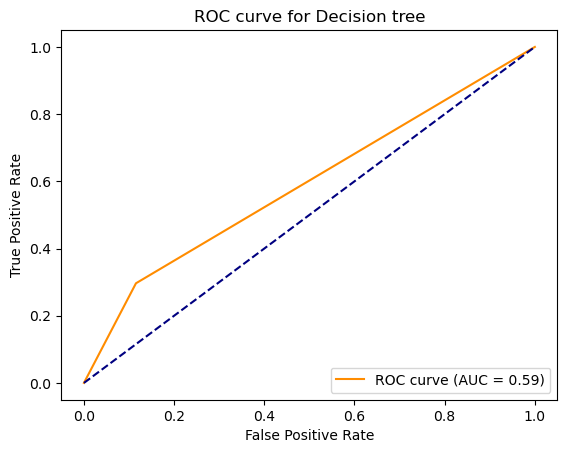

In [219]:
# code from REC3
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the curve (AUC)
auc = roc_auc_score(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision tree')
plt.legend(loc="lower right")
plt.show()

ROC curve: An ROC (Receiver Operating Characteristic) curve is a plot that shows the trade-off between sensitivity and specificity for different classification thresholds. It is a useful way to evaluate the performance of a binary classification model like an SVM. You can plot the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values, and the resulting curve helps us choose the best threshold for your model.

## D. Random forests

In [220]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 
# clf = RandomForestClassifier(class_weight = 'balanced', n_estimators=1000, max_samples=1.0, max_features=0.01,bootstrap=True, criterion='gini')
clf = RandomForestClassifier(class_weight = 'balanced', n_estimators=200, max_samples=0.2, max_features=0.01,bootstrap=True, criterion='gini')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print("Accuracy: ",np.sum(preds == y_test)/len(preds)) 

preds_proba = clf.predict_proba(X_test)
print(preds_proba.shape, y_test.shape)

# Compute the AUC-ROC score 
auc = roc_auc_score(y_test, preds_proba[:,1])

# Find the index of the feature with the highest feature_importance_
best_predictor_idx = clf.feature_importances_.argmax()

# Get the name of the best predictor
best_predictor = X.columns[best_predictor_idx]

# Print the results
print("Best Predictor of diabetes: ", best_predictor)
print("AUC of the Random Forest model: ", auc)

Accuracy:  0.8640807316304006
(50736, 2) (50736,)
Best Predictor of diabetes:  BMI
AUC of the Random Forest model:  0.8192154680395389


### ROC curve

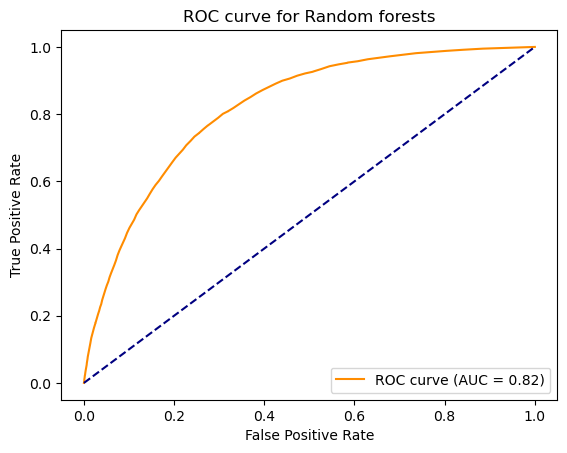

In [221]:
# code from REC3
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, preds_proba[:,1])

# calculate the area under the curve (AUC)
auc = roc_auc_score(y_test, preds_proba[:,1])

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random forests')
plt.legend(loc="lower right")
plt.show()


## E. adaBoost

In [177]:
# Next we implement gradient boosting, in particular the Adaboost algorithm.
# Remember, gradient boosting algorithms involve iteratively improving the decision trees
# and hence involve a learning rate similar to logistic regressions.
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200, learning_rate=1)

### TESTING for better AUC #### 
# bdt = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=500, learning_rate=0.01) # AUC=0.5
# tried a bunch of parameters - still AUC 0.5 

bdt.fit(X_train, y_train)

preds = bdt.predict(X_test)
print(np.sum(preds == y_test)/len(preds))

preds_probs = bdt.predict_proba(X_test)

# Compute the AUC-ROC score 
auc = roc_auc_score(y_test, preds_probs[:,1])

# Find the index of the feature with the highest feature_importance_
best_predictor_idx = bdt.feature_importances_.argmax()

# Get the name of the best predictor
best_predictor = X.columns[best_predictor_idx]

# Print the results
print("Best Predictor of diabetes: ", best_predictor)
print("AUC of the AdaBoost model : ", auc)


0.8668401135288553
Best Predictor of diabetes:  HighBP
AUC of the Random Forest model:  0.8299014484567945


### ROC curve 

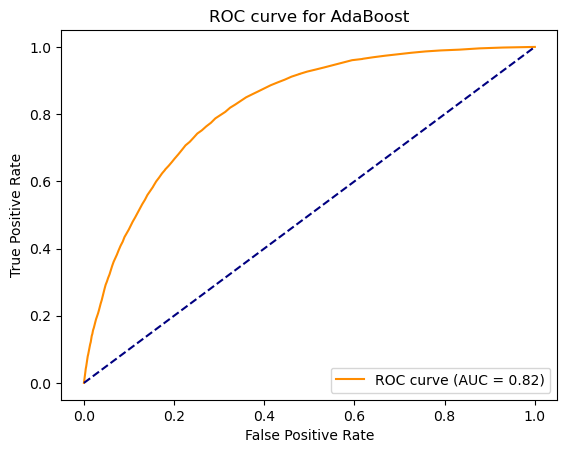

In [178]:
# code from REC3
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test, preds_proba[:,1])

# calculate the area under the curve (AUC)
auc = roc_auc_score(y_test, preds_proba[:,1])

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

# Extra Credit 

Optimization terminated successfully.
         Current function value: 0.361805
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253674
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.1039
Time:                        23:17:56   Log-Likelihood:                -91783.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
HighBP                     1.9551      0.042     46.117      0.000       1.872      

<AxesSubplot:>

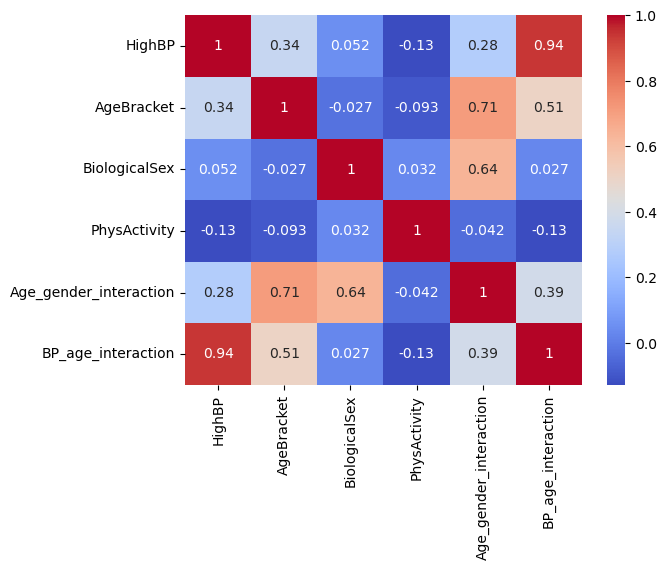

In [229]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv("diabetes.csv") 

# Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
#        'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
#        'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
#        'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
#        'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
#       dtype='object')


# Define the dependent variable and independent variables
y = df['Diabetes']
X = df[['HighBP', 'AgeBracket', 'BiologicalSex', 'PhysActivity']]

# Add interaction terms to the independent variables
X['Age_gender_interaction'] = X['AgeBracket'] * X['BiologicalSex']
X['BP_age_interaction'] = X['HighBP'] * X['AgeBracket']

# Fit a logistic regression model with interaction terms
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

# Visualize the interaction effects using a heatmap
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")

In [231]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset and split it into training and testing sets
data = pd.read_csv('diabetes.csv')
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model's accuracy for each gender separately
female_data = X_test[X_test['BiologicalSex'] == 2]
male_data = X_test[X_test['BiologicalSex'] == 1]

y_pred_female = model.predict(female_data)
y_pred_male = model.predict(male_data)

accuracy_female = accuracy_score(y_test[female_data.index], y_pred_female)
accuracy_male = accuracy_score(y_test[male_data.index], y_pred_male)

# Compare the results
print("Accuracy for female: {:.2f}%".format(accuracy_female*100))
print("Accuracy for male: {:.2f}%".format(accuracy_male*100))

Accuracy for female: 85.31%
Accuracy for male: 87.03%


The difference between the two accuracies is small, so there may not be significant gender bias.
However, after giving it some thought, I realised how it is not really beneficial to do such analysis on gender for such a dataset as we cannot really say whether the model is biased or the data is biased (inferring how diabetic cases or nature is biased which is not really reasonable). In fact, models cannot really be biased if it picks up on reality.
See report for further analysis on other interesting aspects I am able to conclude from the dataset. 